# Finding Heavy Traffic Indicators on I-94

In this project, we will focus on exploratory data visualization techniques for preliminary analysis. We will be using the dataset on the westbound traffic of the I-94 [Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
trafficdf= pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
trafficdf.info()
trafficdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


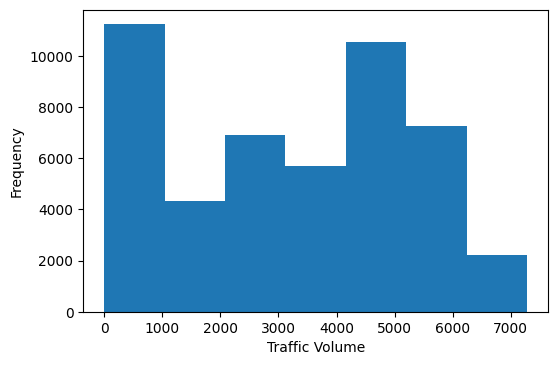

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
#allow jupyter to generate graphs
%matplotlib inline
trafficdf['traffic_volume'].plot.hist(bins=7)
plt.xlabel('Traffic Volume')
plt.show()
trafficdf['traffic_volume'].describe()

## Observations
We can see that the traffic volume varies with majority of occurences between 0-1000 and between 4000-5000.
The maximum traffic volume is at 7280 while the minimum is at 0. Let us now explore another metric that likely affects traffic volume: `date_time`.

## Day Vs Night

In [3]:
trafficdf['date_time']= pd.to_datetime(trafficdf['date_time'])
daytime=[7,8,9,10,11,12,13,14,15,16,17,18]
nighttime=[19,20,21,22,23,24,0,1,2,3,4,5,6]
time_of_day=[]
for row in trafficdf['date_time']:
    hour = row.hour
    if hour in daytime:
        time_of_day.append('day')
    else:
        time_of_day.append('night')
trafficdf['time_of_day']=time_of_day

In [4]:
trafficdf['time_of_day'].value_counts()

night    24327
day      23877
Name: time_of_day, dtype: int64

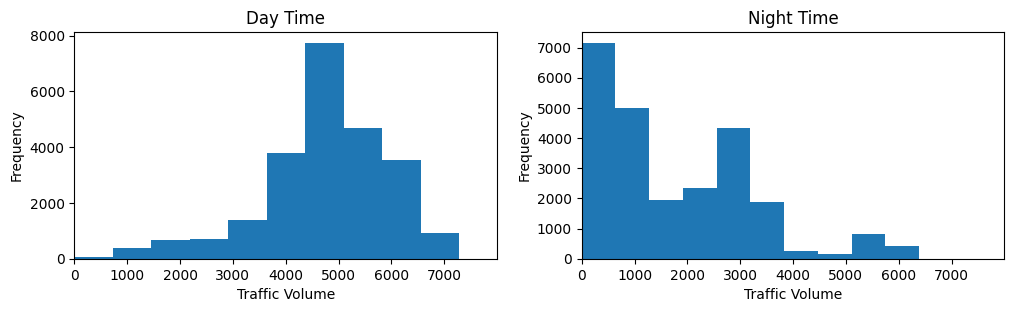

In [5]:
import numpy as np
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
trafficdf.loc[trafficdf['time_of_day']=='day','traffic_volume'].plot.hist(bins=10)
plt.xlabel("Traffic Volume")
plt.title("Day Time")
plt.xticks(np.arange(0, 8000, step=1000))
plt.xlim(0,8000)
plt.subplot(1,2,2)
trafficdf.loc[trafficdf['time_of_day']=='night','traffic_volume'].plot.hist(bins=10)
plt.title("Night Time")
plt.xlabel("Traffic Volume")
plt.xticks(np.arange(0, 8000, step=1000))
plt.xlim(0,8000)
plt.show()

In [6]:
print("Day:\n",trafficdf.loc[trafficdf['time_of_day']=='day','traffic_volume'].describe(),'\n')
print("Night:\n",trafficdf.loc[trafficdf['time_of_day']=='night','traffic_volume'].describe())

Day:
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

Night:
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


The histograms indicate that the `Traffic Volume` is generally higher in the day as compared to night. This is further reinforced by the statistics shown with the `describe` method as the mean `Traffic Volume` is 4762 in the day while the night only has a mean `Traffic Volume` of 1785.

As the `Traffic Volume` is generally lighter in the night and our goal is to find indicators of heavy traffic, we shall only look at daytime data.

## Daytime traffic volume by Month

In [7]:
day=trafficdf.loc[trafficdf['time_of_day']=='day',:].copy()
day['month']=day['date_time'].dt.month
by_month=day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

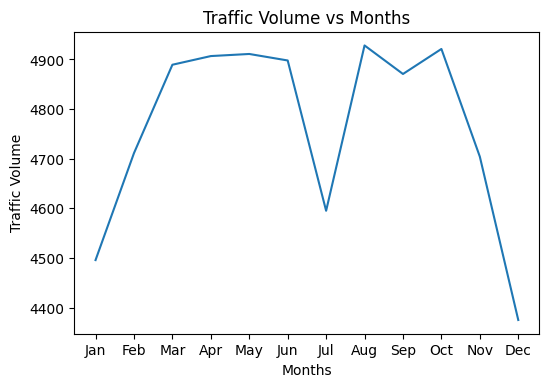

In [8]:

by_month.index=by_month.index.map(str)
by_month.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(0,13,1))
plt.title('Traffic Volume vs Months')
plt.xlabel('Months')
plt.ylabel('Traffic Volume')
by_month['traffic_volume'].plot()
plt.show()

We notice here that the traffic volumes are low in Jan, Feb, Jul and Dec. This is could be due to seasonality.

## Day time traffic volume by Weekday
Let us investigate one level deeper, for each day of the week.

In [9]:
day['dayofweek']=day['date_time'].dt.dayofweek
by_dayofweek=day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

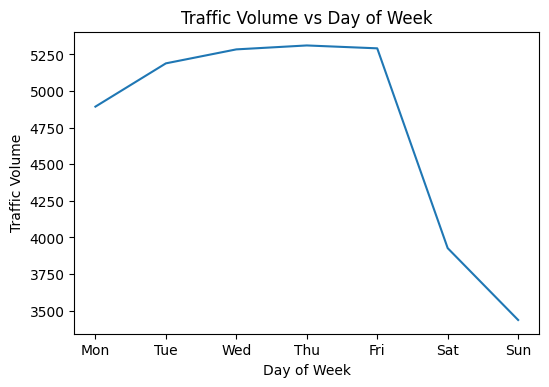

In [10]:
by_dayofweek.index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(np.arange(0,7,1))
by_dayofweek['traffic_volume'].plot()
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume vs Day of Week')
plt.show()

From the graph above, we can see a huge difference in traffic volume between the working days and non-working days. This is not surprising as there are usually more cars on the roads on a weekday.

## Day time traffic volume by time of the day
Let us now dive yet another level deeper, to analyse how traffic volume changes by time of the day.

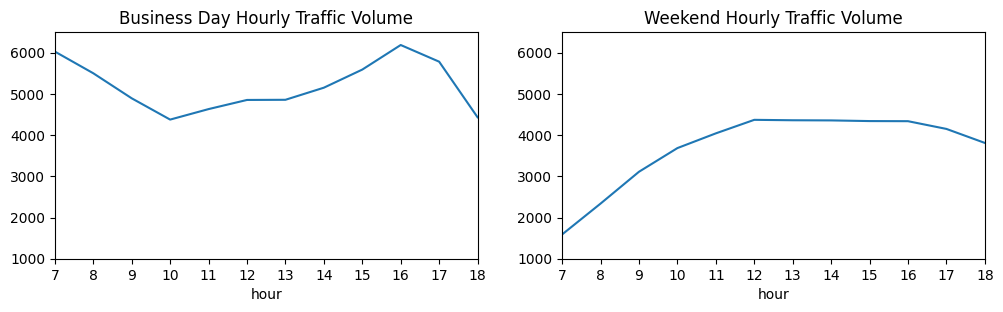

In [11]:
day['hour']= day['date_time'].dt.hour
business_days= day.loc[day['dayofweek']<=4,:]
weekend= day.loc[day['dayofweek']>=5,:]
by_hour_business= business_days.groupby('hour').mean()
by_hour_weekend= weekend.groupby('hour').mean()

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.title('Business Day Hourly Traffic Volume')
plt.xlim(7,18)
plt.xticks(np.arange(7,19,1))
plt.ylim(1000,6500)
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot()
plt.title('Weekend Hourly Traffic Volume')
plt.xlim(7,18)
plt.xticks(np.arange(7,19,1))
plt.ylim(1000,6500)
plt.show()

From the charts above, it is clear that a typical Business Day has higher traffic volume in comparison with the Weekend. 

Additionally, the peak traffic hours on a Business Day is at 7am and 4-5pm. 

While there is no distinct peak traffic hours on weekends, the traffic volume picks up at around 11am and maintains until evening time.

## Traffic Volume vs Time

From the above analysis, we can tell that Traffic Volume is usually higher in the following scenarios:
1. There is generally higher traffic volume in the day than at night.
2. Traffic volume drops significantly during the winter months likely due to dangerous road conditions.
3. The drop in traffic volume in July could be due to summer break as people tend to travel between states at the start and end of summer break.(early June to mid-August)
4. The traffic volume has a higher average on weekdays as compared to weekends likely due to work.
5. The peak hours on a Business Day is at 7am when people travel to work and between 4-5pm when people get off work.

## Traffic Volume vs Weather
Moving on, we will look at how weather conditions tend to affect traffic volume.

In [12]:
#scatter plot to explore correlation between traffic_volume and weather columns
trafficdf.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,time_of_day
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,day
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,day
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,day
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,day
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,day


In [36]:
#find out the correlation values between traffic_volume and numerical weather columns
trafficdf.corr()[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.130299,1.000000,0.009069,-0.019755,-0.101976
rain_1h,0.004714,0.009069,1.000000,-0.000090,0.004818
snow_1h,0.000733,-0.019755,-0.000090,1.000000,0.027931
clouds_all,0.067054,-0.101976,0.004818,0.027931,1.000000
traffic_volume,1.000000,0.130299,0.004714,0.000733,0.067054


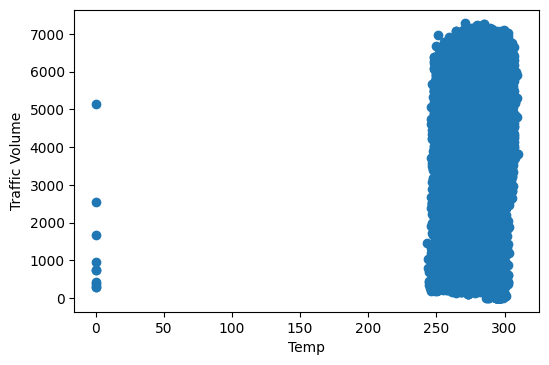

In [37]:
#seems like traffic_volume has the strongest correlation with temp
plt.scatter(trafficdf['temp'],trafficdf['traffic_volume'])
plt.xlabel('Temp')
plt.ylabel('Traffic Volume')
plt.show()

As seen in the plot above, even though the correlation between `temp` and `traffic volume` is the highest amongst the columns about weather, we are not able to draw any meaningful conclusion with the data represented.

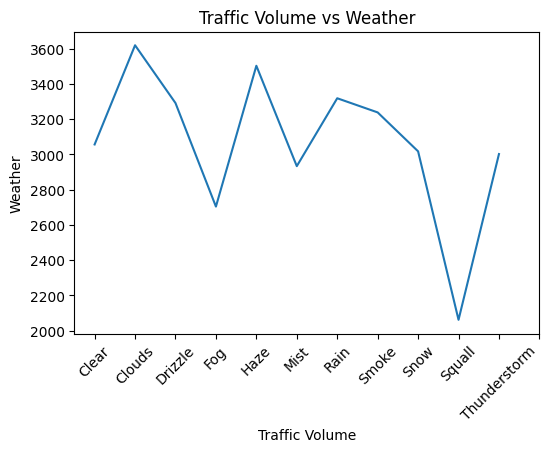

In [82]:
weather= trafficdf.groupby('weather_main')['traffic_volume'].mean()
weather.plot()
plt.xticks(np.arange(0,12,1),weather.index,rotation=45)
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.title('Traffic Volume vs Weather')
plt.show()

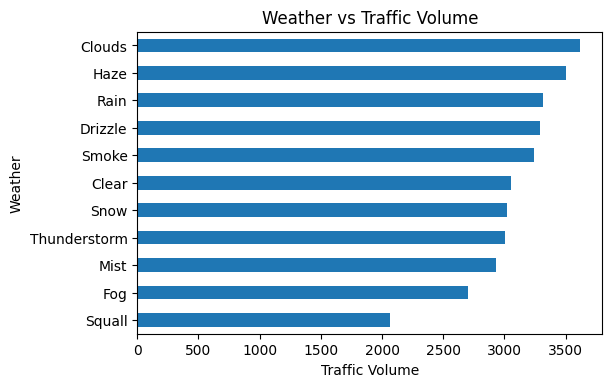

In [85]:
#for better representation, we can use a horizontal bar chart like so
weather.sort_values().plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.title('Weather vs Traffic Volume')
plt.show()

There is no weather condition that causes the traffic volume to be exceedingly high. We are not able to draw a valid conclusion with the chart above.

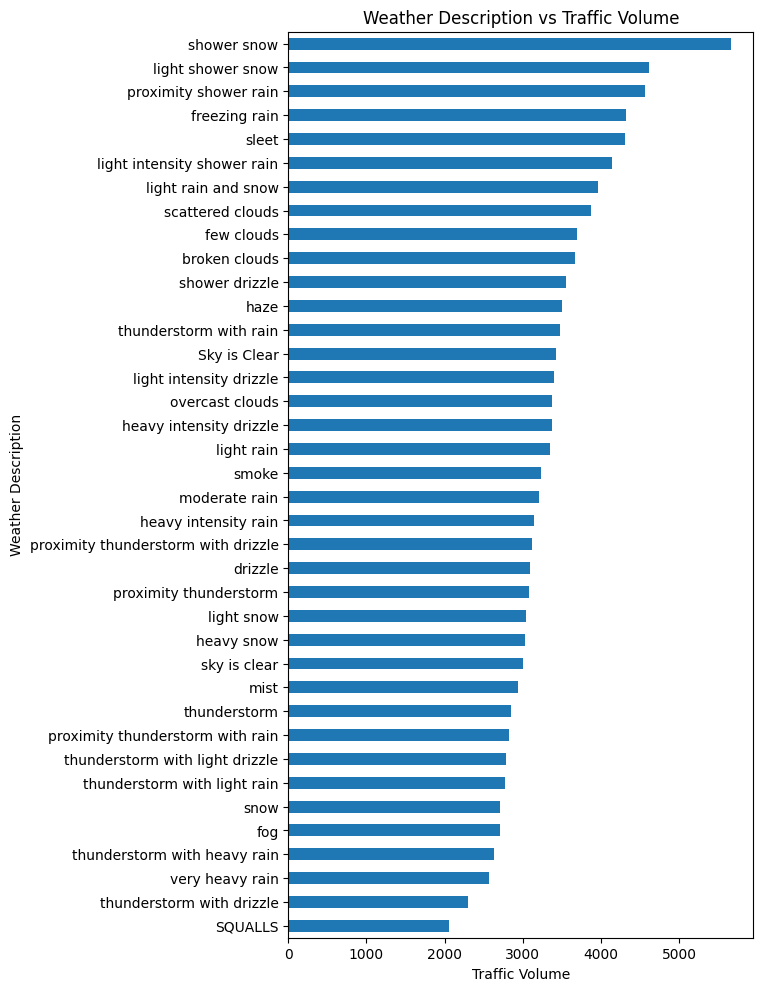

In [83]:
plt.figure(figsize=(6,12))
weatherd= trafficdf.groupby('weather_description')['traffic_volume'].mean().sort_values()
weatherd.plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.title('Weather Description vs Traffic Volume')
plt.show()

The traffic volume is the highest during shower snows and light shower snows. This is likely due to the drop in visibility and the increased probability of accidents, causing drivers to slow down and result in a higher traffic volume.
# Conclusion
All in all, we have looked at several possible heavy traffic indicators.
From time perspective, we have explored the data at `Monthly`, `Weekly` and `Daily` levels. Where we identified peak months, days and hours respectively. 

We also explored possible weather conditions that adversely affect the traffic conditions and found shower snows to be the top contributor of high traffic volume.